In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/opt/anaconda3/envs/personalization/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Spark UI address http://127.0.0.1:4040


In [4]:
import tarfile
tar2 = tarfile.open("../data/sample.tar.gz")
sample_df = pd.read_csv(tar2.extractfile(tar2.getnames()[2]),header=0)

# Beging of Analysis

/opt/anaconda3/envs/personalization/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0.5, 1.0, '# of ratings for users')

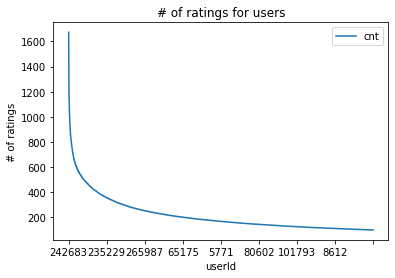

In [58]:
user_rating_cnt = sample_df.userId.value_counts().to_frame("cnt")
user_rating_cnt['userId'] = user_rating_cnt.index.astype(str)
user_rating_cnt.plot(x="userId",y="cnt")
plt.ylabel("# of ratings")
plt.title("# of ratings for users")

From the above graph we could see our whole dataset(sampled from movielens) contains a few power users and most of the users have rated about 400 or less. We will set number of ratings greater than 400 as power users and less than 400 ratings as non frequent users. We will compare how the system performs on two groups.

In [50]:
def frequent_user(sample_df):
    """
    return list of userId that has rated more than 400 movies
    """
    user_rating_cnt = sample_df.userId.value_counts().to_frame("cnt")
    return list(user_rating_cnt[user_rating_cnt.cnt > 400].index)

def non_frequent_user(sample_df):
    """
    return list of userId that has rated less or equal to 400 movies
    """
    user_rating_cnt = sample_df.userId.value_counts().to_frame("cnt")
    return list(user_rating_cnt[user_rating_cnt.cnt <= 400].index)

In [52]:
freq_userId = frequent_user(sample_df)
non_freq_userId = non_frequent_user(sample_df)

In [46]:
################ making up data
test_known_pred_final = sample_df.copy(deep=True)
test_known_pred_final['prediction'] = np.random.normal(3,1.67,len(test_known_pred_final))
test_known_pred_final = test_known_pred_final[['userId','movieId','rating','prediction']]

In [53]:
test_freq = test_known_pred_final[test_known_pred_final.userId.isin(freq_userId)]
test_non_freq = test_known_pred_final[test_known_pred_final.userId.isin(non_freq_userId)]

Text(0.5, 1.0, 'RMSE between frequent users and non frequent users')

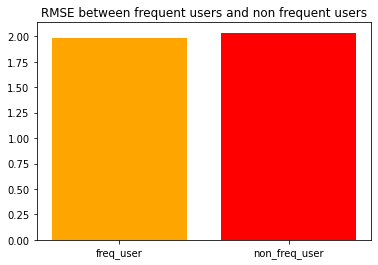

In [67]:
#from sklearn.metrics import mean_squared_error
#def rmse_numpy(true, pred):
    #return np.sqrt(mean_squared_error(true, pred))
freq_rmse = rmse_numpy(test_freq.rating,test_freq.prediction)
non_freq_rmse = rmse_numpy(test_non_freq.rating,test_non_freq.prediction)
plt.bar(x=['freq_user','non_freq_user'],height=[freq_rmse,non_freq_rmse],color=['orange','red'])
plt.title("RMSE between frequent users and non frequent users")

# Novelty

/opt/anaconda3/envs/personalization/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0.5, 1.0, '# of ratings received by movie')

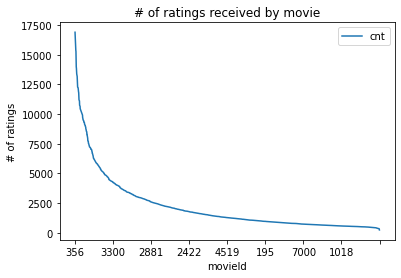

In [68]:
movie_rating_cnt = sample_df.movieId.value_counts().to_frame("cnt")
movie_rating_cnt['movieId'] = movie_rating_cnt.index.astype(str)
movie_rating_cnt.plot(x="movieId",y="cnt")
plt.ylabel("# of ratings")
plt.title("# of ratings received by movie")

We then investigate from movie's perspective. From above graph, we could see that we could set the cutoff between popular movies and niche movies at about 5000 ratings.

In [69]:
def popular_movie(sample_df):
    """
    return list of movieId that has been rated more than 5000 times
    """
    movie_rating_cnt = sample_df.movieId.value_counts().to_frame("cnt")
    return list(movie_rating_cnt[movie_rating_cnt.cnt > 5000].index)

def niche_movie(sample_df):
    """
    return list of movieId that has been rated less or equal to 5000 times
    """
    movie_rating_cnt = sample_df.movieId.value_counts().to_frame("cnt")
    return list(movie_rating_cnt[movie_rating_cnt.cnt <= 5000].index)

In [70]:
pop_movieId = popular_movie(sample_df)
niche_movieId = niche_movie(sample_df)

In [71]:
test_pop = test_known_pred_final[test_known_pred_final.movieId.isin(pop_movieId)]
test_niche = test_known_pred_final[test_known_pred_final.movieId.isin(niche_movieId)]

Text(0.5, 1.0, '# of niche movies recommeded compare to popular movies')

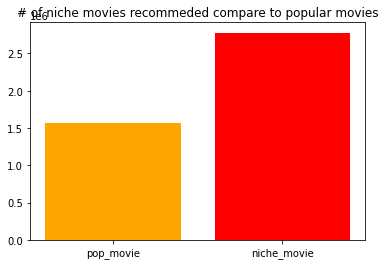

In [74]:
plt.bar(x=['pop_movie','niche_movie'],height=[len(test_pop),len(test_niche)],color=['orange','red'])
plt.title("# of niche movies recommeded compare to popular movies")